#Question 1

AI is not only in Machine Learning & Deep Learning but in also many crucial domains such as in this Venn diagram.
![alt text](https://i.imgur.com/9zT8vuz.png)

# Question 2

TEPFA = Standard frame for a Machine Learning model, including:


*   **T-(Task)** tasks given to computer to execute, requiring to identify input $X$ and output $Y$.

*   **E-(Experience)** experience given to computer, for example, dataset $D$ has pairs of $\{(x^t,y^t)\}_{t=1}^n$ pattern.
*   **P-(Performance)** performance evaluation comparing the difference between output $\hat{y}$  predicted by AI and labeln $y$ of all the dataset $D$.

*   **F-(Function Space)** function space where computer must optimize, for example the linear regregression, deep learning models.

*   **A-(Algorithm)** algorithms to provide solutions of optimized functions in the function space $F$, for example, using gradient.

TEPFA in Linear Regression: 

*   Task: Calculate the output as a real number $y$ for each input $x$.
*   Experience: Dataset of X và label Y
*   Performance: Use Mean Squared Error or Mean Absolute Error to evaluate the error between (predicted Y) and (actual Y)
*   Function Space: Function space of Linear Regression function $\hat{y} = w^\top x +b$. We need to find a pair of $(w,b)$ to minize the error in the training set.
*   Algorithm: Gradient Descent




# Question 3 (1 weight)


In [ ]:
import numpy as np 
# for splitting data into train & test set
from sklearn.model_selection import train_test_split
# for creating Linear Regression model 
from sklearn.linear_model import LinearRegression 
# Metrics for evaluating model performance
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
# Draw chart
import matplotlib.pyplot as plt

In [ ]:
# Set random seed to make sure results are the same
np.random.seed(1612)
# Random from the “standard normal” distribution
x = np.random.randn(4000,1)
# Random noise
noise = np.random.randn(4000,1)
y_1 = 5 * (x**3) + 3 * (x**2) + 10 * noise + 2

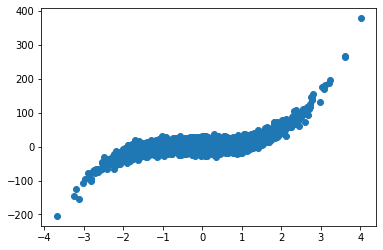

In [ ]:
plt.scatter(x,y_1) # Plot the whole dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y_1, test_size=0.2, shuffle=True, random_state=1612)
print('Shape of x train', x_train.shape)
print('Shape of y train', y_train.shape)
print('Shape of x test', x_test.shape)
print('Shape of y test', y_test.shape)

Shape of x train (3200, 1)
Shape of y train (3200, 1)
Shape of x test (800, 1)
Shape of y test (800, 1)


In [ ]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept and coefficients
print('Bias:', model_1.intercept_)
print('Weight:', model_1.coef_)

Bias: [5.54306702]
Weight: [[15.66643622]]


In [ ]:
y_pred = model_1.predict(x_test)
print('Y predicted shape:', y_pred.shape)

Y predicted shape: (800, 1)


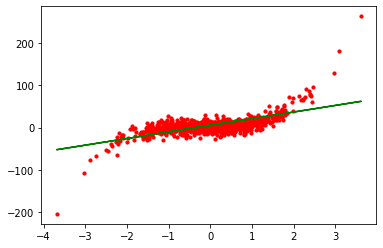

In [ ]:
# plot test set and trained model
plt.scatter(x_test, y_test, s=10, c='red')
plt.plot(x_test, y_pred, c='green')
plt.show()

In [ ]:
print('Mean Absolute Error on Test Set:', MAE(y_test, y_pred))
print('Mean Squared Error on Test Set:', MSE(y_test, y_pred))

Mean Absolute Error on Test Set: 11.804714180878472
Mean Squared Error on Test Set: 302.80077580338616


# Question 3 (2 weights)

In [ ]:
x1 = x ** 3
x2 = x ** 2
y_2 = 5 * x1 + 3 * x2 + 10 * noise + 2
print(x1.shape, x2.shape, y_2.shape)

(4000, 1) (4000, 1) (4000, 1)


In [ ]:
x1

array([[ 1.16476385e-03],
       [-5.15687458e-03],
       [ 1.21026825e+00],
       ...,
       [ 1.39122629e+00],
       [-4.22754961e-02],
       [ 5.29922771e+00]])

In [ ]:
import plotly.express as px
def scatter_3d(x, y, z):
  x = np.squeeze(x) # https://numpy.org/doc/1.18/reference/generated/numpy.squeeze.html
  y = np.squeeze(y)
  z = np.squeeze(z)
  fig = px.scatter_3d(x=x, y=y, z=z)
  fig.show()
scatter_3d(x1, x2, y_2)

In [ ]:
# concatenate x1, x2 into 1 big matrix X
X = np.concatenate((x1, x2), axis=1)  # https://numpy.org/doc/1.18/reference/generated/numpy.concatenate.html?highlight=numpy%20concatenate#numpy.concatenate
print('Shape of matrix X:', X.shape)
print(X)

Shape of matrix X: (4000, 2)
[[ 1.16476385e-03  1.10702796e-02]
 [-5.15687458e-03  2.98486284e-02]
 [ 1.21026825e+00  1.13567595e+00]
 ...
 [ 1.39122629e+00  1.24623090e+00]
 [-4.22754961e-02  1.21355410e-01]
 [ 5.29922771e+00  3.03954367e+00]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size=0.2, shuffle=True, random_state=1612)

In [ ]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept and coefficients
print('Bias:', model_2.intercept_)
print('Weight:', model_2.coef_)

Bias: [2.19383873]
Weight: [[4.99741991 2.91446613]]


In [ ]:
y_pred = model_2.predict(X_test)
print('Y predicted shape:', y_pred.shape)

Y predicted shape: (800, 1)


In [ ]:
print('Mean Absolute Error on Test Set:', MAE(y_test, y_pred))
print('Mean Squared Error on Test Set:', MSE(y_test, y_pred))

Mean Absolute Error on Test Set: 7.962341803703527
Mean Squared Error on Test Set: 100.92358071788152


In [ ]:
import plotly.graph_objects as go

def scatter_and_model_3d(x_test, y_test, y_pred):
  temp_x = np.expand_dims(X_test[:,0], axis=1)
  temp_y = np.expand_dims(X_test[:,1], axis=1)
  fig = go.Figure()
  fig.add_trace(go.Scatter3d(x=temp_x, y=temp_y, z=y_test))
  #fig.add_trace(go.Line(x=temp_x, y=temp_y, z=y_pred))
  fig.show(renderer="colab")

scatter_and_model_3d(X_test, y_test, y_pred)


# Bonus: Non-Linear Model

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_1, test_size=0.2, shuffle=True, random_state=1612)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

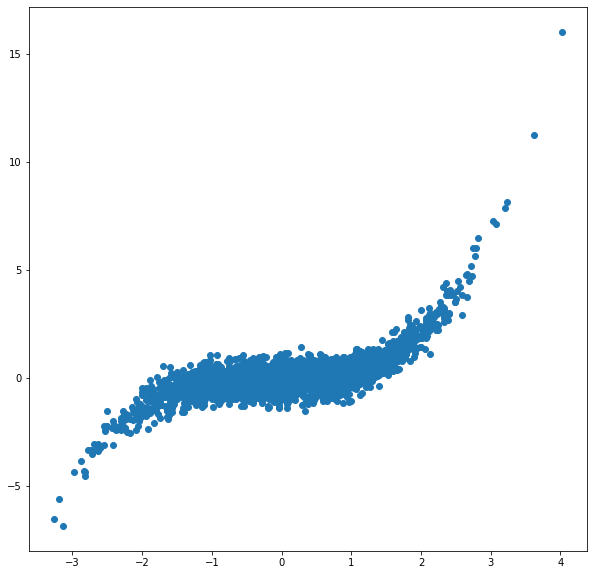

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x_train, y_train)

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=x.shape[1:])) #(3200, 1) --> 1
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.fit(x_train, y_train, epochs=100, verbose=0, batch_size=x_train.shape[0]) #(3200,1) --> 3200

In [ ]:
model.evaluate(x_test, y_test, batch_size=x_test.shape[0]) # (800, 1) --> 800

1/1 [==============================] - 0s 1ms/step - loss: 0.1974 - mae: 0.3471


[0.1974058896303177, 0.3470659554004669]

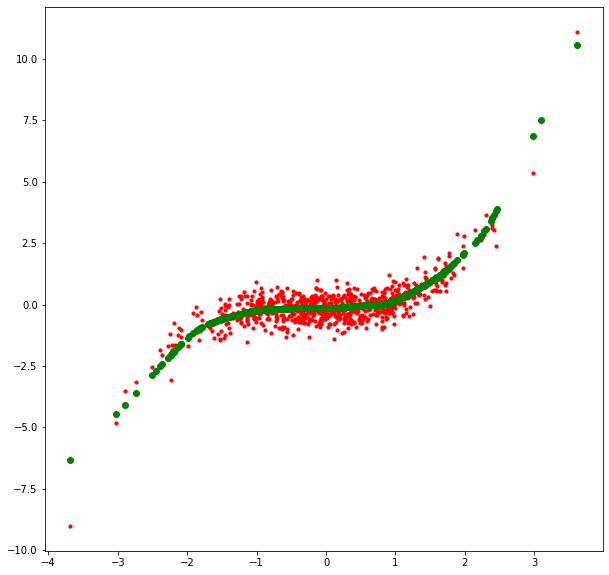

In [ ]:
y_pred = model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(x_test, y_test, s=10, c='red')
plt.scatter(x_test, y_pred, c='green')
plt.show()